In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress
q_results = pd.read_csv("../datasets/CVD_cleaned.csv")


# Looking at the summary statistics for ailment count across different age categories, there's a clear trend of increasing mean and variance as age increases. This suggests that, on average, individuals in higher age categories tend to have a higher number of ailments, and there is greater variability in ailment counts within those age groups.

The median ailment count remains consistently low (at 0.0) for all age categories, indicating that half of the individuals in each group have no reported ailments. The standard deviation and standard error also increase with age, reflecting the increasing dispersion and uncertainty in ailment counts as individuals get older.

Interestingly, the mean and median are close for the younger age categories but start to diverge in the older age categories, suggesting a positively skewed distribution. This skewness is also evident in the increasing difference between the mean and median as age increases.

In summary, the analysis indicates a general trend of higher ailment counts in older age categories with increased variability, and it highlights the skewness of the ailment count distribution, particularly in the older population.

In [20]:
unique_values = q_results['Age_Category']
total_unique_count = len(unique_values)
total_unique_count

308854

In [21]:
# Replace 'df' with the actual name of your DataFrame

columns_to_check = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']

# Create a new column 'Health_status' and initialize it with zeros
q_results['Ailment_Count'] = 0

# Loop through each row and count the incidents of "yes"
for index, row in q_results.iterrows():
    health_count = sum(row[columns_to_check] == 'Yes')
    q_results.at[index, 'Ailment_Count'] = health_count




In [22]:
import pandas as pd
from statistics import mode

category_column = 'Age_Category'
numeric_column = 'Ailment_Count'

# Using the aggregation method to calculate summary statistics
grouped_statistics = q_results.groupby(category_column)[numeric_column].agg(['mean', 'median', 'var', 'std', 'sem', lambda x: mode(x)])

# Rename the columns
new_column_names = ['Mean ailment count', 'Median ailment count', 'ailment count Variance', 'ailment count Std. Dev.', 'ailment count Std. Err.', 'Mode ailment count']
grouped_statistics.columns = new_column_names

# Convert the result to a DataFrame
summary_dataframe = pd.DataFrame(grouped_statistics)
summary_dataframe




,Mean ailment count,Median ailment count,ailment count Variance,ailment count Std. Dev.,ailment count Std. Err.,Mode ailment count
Age_Category,,,,,,
18-24,0.312082,0.0,0.277011,0.526318,0.003851,0
25-29,0.365561,0.0,0.351737,0.593074,0.004765,0
30-34,0.397656,0.0,0.418949,0.647263,0.004768,0
35-39,0.459720,0.0,0.505803,0.711198,0.004954,0
40-44,0.534244,0.0,0.615978,0.784843,0.005341,0
45-49,0.661770,0.0,0.761925,0.872883,0.006028,0
50-54,0.789377,1.0,0.895786,0.946460,0.005974,0
55-59,0.955942,1.0,1.029678,1.014730,0.006058,0
60-64,1.110988,1.0,1.113140,1.055055,0.005860,1


In [23]:
!pip install python-pptx

In [24]:
import pandas as pd
from statistics import mode
from pptx import Presentation
from pptx.util import Inches
from io import BytesIO

# Your original code for summary statistics
category_column = 'Age_Category'
numeric_column = 'Ailment_Count'

# Using the aggregation method to calculate summary statistics
grouped_statistics = q_results.groupby(category_column)[numeric_column].agg(['mean', 'median', 'var', 'std', 'sem', lambda x: mode(x)])

# Rename the columns
new_column_names = ['Mean ailment count', 'Median ailment count', 'ailment count Variance', 'ailment count Std. Dev.', 'ailment count Std. Err.', 'Mode ailment count']
grouped_statistics.columns = new_column_names

# Convert the result to a DataFrame
summary_dataframe = pd.DataFrame(grouped_statistics)

# Create a PowerPoint presentation object
presentation = Presentation()

# Create a new slide
slide_layout = presentation.slide_layouts[5]  # Choose a layout (5 is a blank slide)
slide = presentation.slides.add_slide(slide_layout)

# Convert the DataFrame to a table and add it to the slide
rows, cols = summary_dataframe.shape
table = slide.shapes.add_table(rows=rows + 1, cols=cols, left=Inches(1), top=Inches(1), width=Inches(8), height=Inches(0.8)).table

# Add column names as the header row
for col, col_name in enumerate(summary_dataframe.columns):
    table.cell(0, col).text = col_name

# Add data to the table
for row in range(rows):
    for col in range(cols):
        table.cell(row + 1, col).text = str(summary_dataframe.iloc[row, col])

# Save the PowerPoint presentation
presentation.save('summary_statistics.pptx')


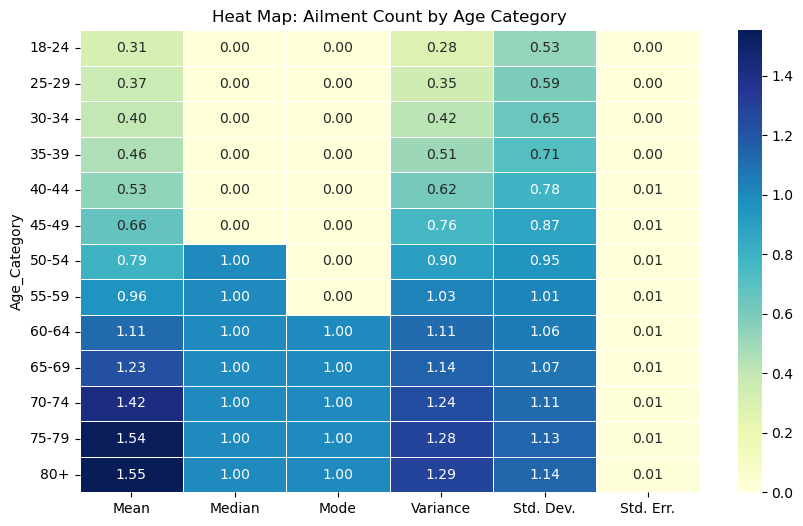

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'q_results' with columns 'Age_Category' and 'Health_status'
# Replace 'q_results', 'Age_Category', and 'Health_status' with your actual DataFrame and column names

category_column = 'Age_Category'
numeric_column = 'Ailment_Count'

# Using the aggregation method to calculate summary statistics, including mode
grouped_statistics = q_results.groupby(category_column)[numeric_column].agg(['mean', 'median', lambda x: mode(x), 'var', 'std', 'sem' ])

# Rename the columns
new_column_names = ['Mean', 'Median' , 'Mode', 'Variance', 'Std. Dev.', 'Std. Err.']
grouped_statistics.columns = new_column_names

# Convert the result to a DataFrame
summary_dataframe = pd.DataFrame(grouped_statistics)

# Plot the result on a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(summary_dataframe, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title(f'Heat Map: Ailment Count by Age Category')
plt.show()


In [26]:
import pandas as pd
from statistics import mode

numeric_column = 'Ailment_Count'

# Using the aggregation method to calculate summary statistics
grouped_statistics = q_results[numeric_column].agg(['mean', 'median', 'var', 'std', 'sem', lambda x: mode(x)])

# Rename the columns
new_column_names = ['Mean Ailment Count', 'Median Ailment Count', 'Ailment Count Variance', 'Ailment Count Std. Dev.', 'Ailment Count Std. Err.', 'Mode Ailment Count']
grouped_statistics.columns = new_column_names

# Convert the result to a DataFrame
summary_dataframe = pd.DataFrame(grouped_statistics)
print(summary_dataframe)


          Ailment_Count
mean           0.932434
median         1.000000
var            1.076603
std            1.037595
sem            0.001867
<lambda>       0.000000


This table provides a breakdown of the population based on different age categories. Let's analyze the age demographics:

Largest Age Group: The largest age group in this population is individuals aged 65-69, with a count of 33,434. This suggests a significant presence of individuals in their mid to late 60s.

Distribution Across Age Ranges: The population seems to have a relatively balanced distribution across various age ranges. Age groups 60-64, 70-74, and 55-59 also have substantial counts, indicating a diverse distribution of ages.

Elderly Population: The age categories 80+ and 75-79 suggest a notable presence of elderly individuals in the population. The counts for these age groups are 22,271 and 20,705, respectively.

Middle-Aged Population: Age groups 40-44, 45-49, 35-39, and 30-34 show significant counts, indicating a substantial presence of middle-aged individuals.

Young Adults: The age group 18-24 has a relatively lower count compared to other age groups, suggesting a smaller representation of young adults in the population.

Consistent Decrease in Counts: Generally, there is a trend of decreasing counts as age categories progress from younger to older. This aligns with the typical demographic distribution, where older age groups tend to have fewer individuals.

In summary, this population exhibits a diverse age demographic with a notable presence of individuals in their mid to late 60s, a substantial elderly population, and a balanced distribution across various age ranges.

In [27]:
branch_18_24 = ['18-24']
q_results_18_24 = q_results.loc[q_results['Age_Category'].isin(branch_18_24),:]

branch_25_29 = ['25-29']
q_results_25_29 = q_results.loc[q_results['Age_Category'].isin(branch_25_29),:]

branch_30_34 = ['30-34']
q_results_30_34 = q_results.loc[q_results['Age_Category'].isin(branch_30_34),:]

branch_35_39 = ['35-39']
q_results_35_39 = q_results.loc[q_results['Age_Category'].isin(branch_35_39),:]

branch_40_44 = ['40-44']
q_results_40_44 = q_results.loc[q_results['Age_Category'].isin(branch_40_44),:]

branch_45_49 = ['45-49']
q_results_45_49 = q_results.loc[q_results['Age_Category'].isin(branch_45_49),:]

branch_50_54 = ['50-54']
q_results_50_54 = q_results.loc[q_results['Age_Category'].isin(branch_50_54),:]

branch_55_59 = ['55-59']
q_results_55_59 = q_results.loc[q_results['Age_Category'].isin(branch_55_59),:]

branch_60_64 = ['60-64']
q_results_60_64 = q_results.loc[q_results['Age_Category'].isin(branch_60_64),:]

branch_70_74 = ['70-74']
q_results_70_74 = q_results.loc[q_results['Age_Category'].isin(branch_70_74),:]

branch_80 = ['80+']
q_results_80 = q_results.loc[q_results['Age_Category'].isin(branch_80),:]




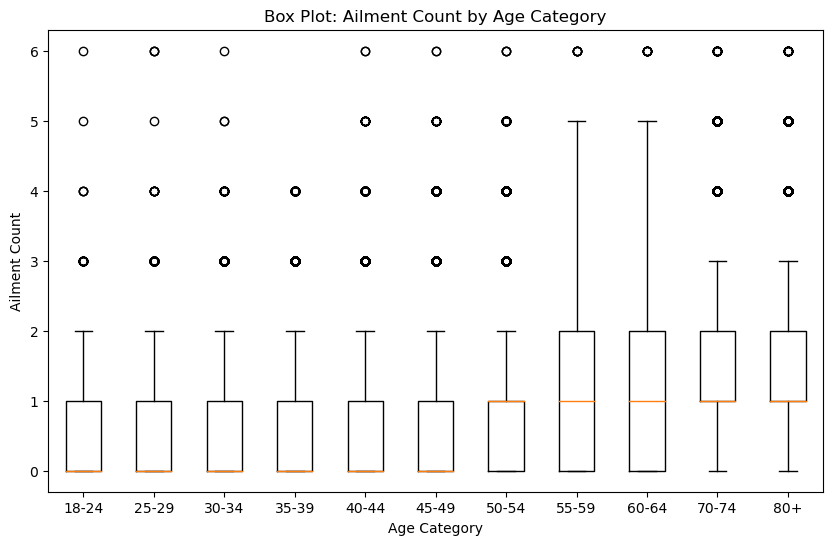

In [28]:
# Define age categories
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '70-74', '80+']

# Create a list to store DataFrames
dataframes = []

# Loop through age categories and create DataFrames
for category in age_categories:
    branch_df = q_results.loc[q_results['Age_Category'].isin([category]), :]
    dataframes.append(branch_df['Ailment_Count'])

# Generate a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.boxplot(dataframes, labels=age_categories)
plt.xlabel('Age Category')
plt.ylabel('Ailment Count')
plt.title('Box Plot: Ailment Count by Age Category')
plt.show()


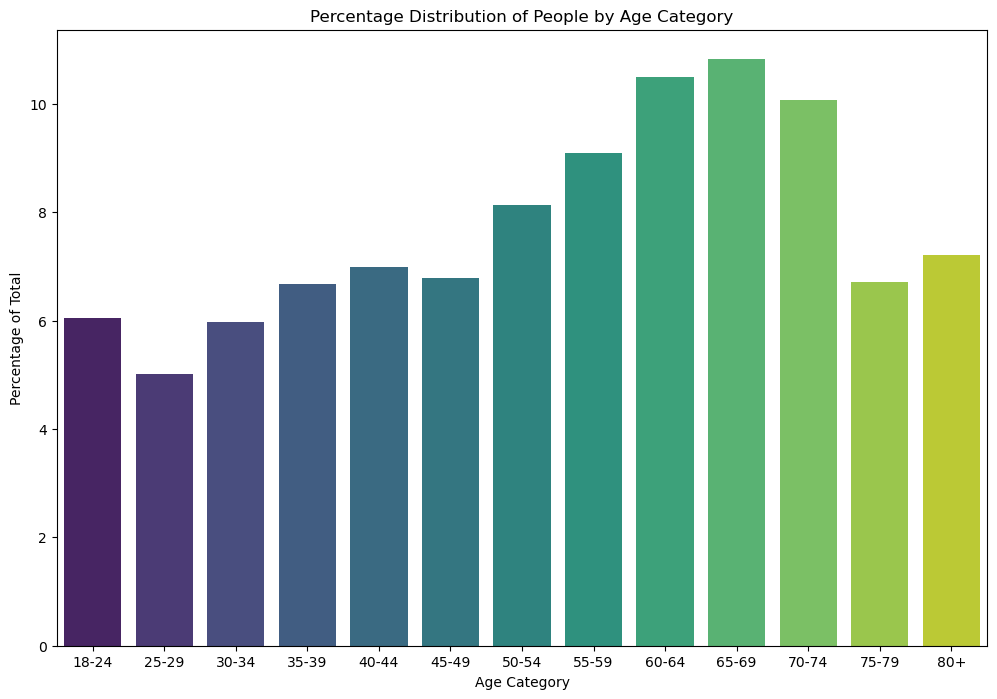

In [29]:

# Calculate the count of each age group
age_counts = q_results['Age_Category'].value_counts().reset_index()
age_counts.columns = ['Age_Category', 'Count']
# Assuming 'age_counts' is your DataFrame
# Replace 'age_counts' with the actual name of your DataFrame

# Calculate the percentage of each age group to the total
total_count = age_counts['Count'].sum()
age_counts['Percentage'] = (age_counts['Count'] / total_count) * 100

# Reset the index to make 'Age_Category' a regular column and sort by 'Age_Category'
age_counts_reset = age_counts.reset_index().sort_values(by='Age_Category')

# Plot bar chart with percentages on the y-axis
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Category', y='Percentage', data=age_counts_reset, palette='viridis')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Total')
plt.title('Percentage Distribution of People by Age Category')

# Save the plot as an image
plt.savefig('output_data/age_distribution_chart.png')

plt.show()



In [30]:
# Specify the columns to extract and unpivot
columns_to_extract = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']

# Extract the specified columns and unpivot them
unpivoted_df = pd.melt(q_results, id_vars=['Age_Category'], value_vars=columns_to_extract, var_name='Ailment', value_name='Diagnosis')

branch_ailment = ['Yes']
q_results_ailment = unpivoted_df.loc[unpivoted_df['Diagnosis'].isin(branch_ailment),:]

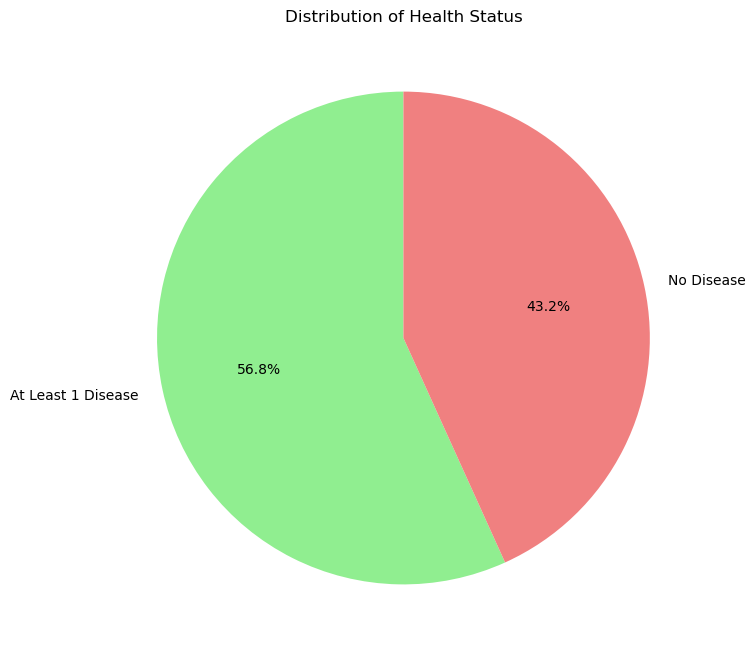

In [31]:
# Determine people with no disease and those with at least 1
q_results['Health_Status'] = 'No Disease'
q_results.loc[q_results['Ailment_Count'] > 0, 'Health_Status'] = 'At Least 1 Disease'

# Count the occurrences of each health status
health_status_counts = q_results['Health_Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(health_status_counts, labels=health_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Health Status')
plt.show()


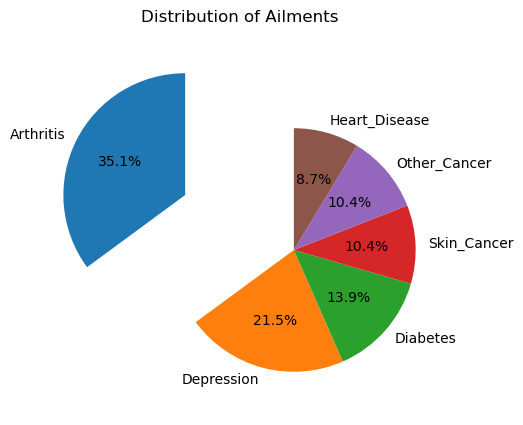

In [32]:

# Calculate the percentage of each ailment
ailment_percentage = q_results_ailment['Ailment'].value_counts(normalize=True) * 100

# Identify the ailment with the highest percentage
highest_percentage_ailment = ailment_percentage.idxmax()

# Define explode values (1.0 for the highest percentage ailment, 0 for others)
explode_values = [1.0 if ailment == highest_percentage_ailment else 0 for ailment in ailment_percentage.index]

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(ailment_percentage, labels=ailment_percentage.index, autopct='%1.1f%%', startangle=90, explode=explode_values)
plt.title('Distribution of Ailments')
plt.axis("equal")
plt.show()


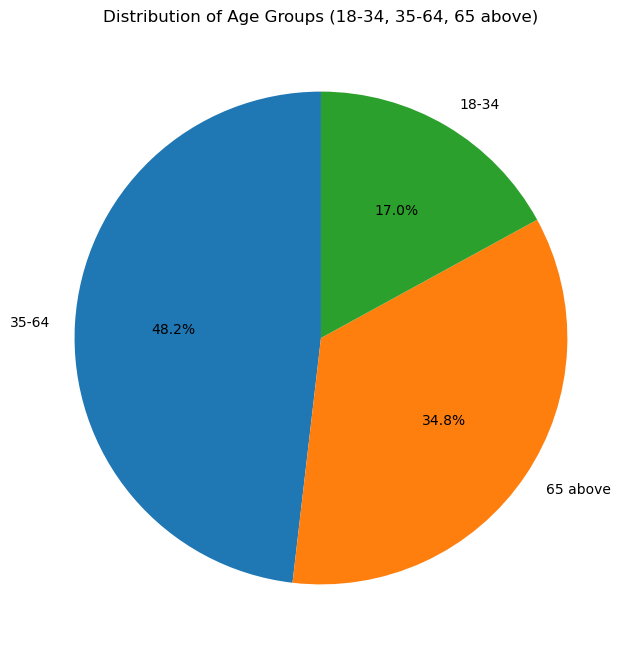

In [33]:

# Create a new column 'Age_Group' based on the condition
q_results['Age_Group'] = q_results['Age_Category'].apply(lambda x: '18-34' if x in ['18-24', '25-29', '30-34'] else ('35-64' if x in ['35-39', '40-44', '45-49', '50-54', '55-59', '60-64'] else '65 above'))

# Get unique value counts of 'Age_Group'
age_group_counts = q_results['Age_Group'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups (18-34, 35-64, 65 above)')
plt.show()



Correlation Coefficient: 0.2022298606645197


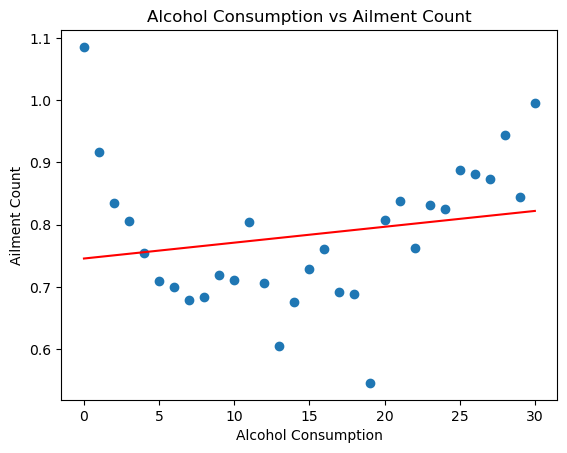

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

# Assuming 'Alcohol_Consumption' and 'Ailment_Count' are the column names in your DataFrame
patient_ailment_count = q_results.groupby(['Alcohol_Consumption'])['Ailment_Count'].mean().reset_index()

# Scatter plot
plt.scatter(patient_ailment_count['Alcohol_Consumption'], patient_ailment_count['Ailment_Count'])

# Adding labels and title
plt.title('Alcohol Consumption vs Ailment Count')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Ailment Count')

# Calculate correlation coefficient
corr_coef, _ = pearsonr(patient_ailment_count['Alcohol_Consumption'], patient_ailment_count['Ailment_Count'])
print(f"Correlation Coefficient: {corr_coef}")

# Fit a linear regression model
slope, intercept, _, _, _ = linregress(patient_ailment_count['Alcohol_Consumption'], patient_ailment_count['Ailment_Count'])

# Plotting the regression line
plt.plot(patient_ailment_count['Alcohol_Consumption'], slope * patient_ailment_count['Alcohol_Consumption'] + intercept, color='red')

# Display the plot
plt.show()



# a correlation coefficient of 0.2022 suggests a positive but weak linear relationship between 'Alcohol Consumption' and 'Health Status.' As the correlation coefficient is positive, it means that as 'Alcohol Consumption' tends to increase, 'Ailment Count' also tends to increase, but the relationship is not very strong. The closeness to zero (0.2022) indicates that the relationship is relatively weak.

Variance (1.29): Variance is a measure of how spread out the values in a dataset are. A higher variance indicates a greater spread of data points from the mean. In this case, a variance of 1.29 suggests some variability in the data.

Standard Deviation (1.14): Standard deviation is the square root of the variance. It provides a measure of the average distance between each data point and the mean. A higher standard deviation indicates more dispersion of data points around the mean.

Standard Error (0.01): Standard error is a measure of the variability of sample means. A lower standard error suggests that the sample mean is likely a good estimate of the population mean. It's often used in inferential statistics when making predictions about the entire population based on a sample.

In summary, your data has a moderate level of variability (as indicated by the variance and standard deviation) with a relatively small standard error, which suggests that sample means are likely to be close to the population mean. The interpretation may vary based on the context of your analysis and the nature of the data.